# BY: RHEANNE ALIBUDBUD


**Project Overview:**

This project simulates an analysis for a fictional independent cinema streaming platform
called "ArtHouse Central." While using a data structure like many publicly available
datasets, our focus will be on uncovering nuanced viewing patterns, genre aCinities, and
engagement trends specific to an audience presumed to appreciate independent, arthouse, and niche films. The goal is to leverage Python's data analysis and visualization
capabilities to provide actionable insights for platform curation and user engagement
strategies.

Datasets:
For this project, we'll use three primary data files. Imagine these are exports from the
"ArtHouse Central" platform's database:
1. viewer_feedback.csv: This file captures how viewers have rated specific films.
o viewer_id: A unique identifier for each platform subscriber.
o film_id: A unique identifier for each film in the catalog.
o rating_score: The score (e.g., 1-5 stars) given by the viewer.
o feedback_timestamp: The time when the rating was submitted.
2. film_catalog.csv: This file contains details about the films available on the platform.
o film_id: Unique identifier for each film.
o film_title: The title of the film.
o premiere_date: Date the film was made available or originally released.
o Genre Columns (e.g., Drama, Comedy, etc.): Binary flags (1 if the film belongs
to the genre, 0 otherwise) for various niche and common genres.
3. subscriber_profiles.csv: This file contains demographic and descriptive information
about the platform's subscribers.
o viewer_id: Unique identifier for each subscriber.
o viewer_age: Age of the subscriber.
o viewer_gender: Gender of the subscriber.
o viewer_profession: Self-reported profession of the subscriber.
o subscriber_region_code: A code representing the subscriber's geographical
region (e.g., zip code).

**Key Analytical Objectives & Unique Questions to Explore:**

The core of this project is to go beyond typical EDA and answer specific questions relevant
to an independent cinema platform: (1-7 collectively 2 marks)
1. mport the necessary packages
2. Read the 3 datasets into dataframes
3. Apply info, shape, describe, and find the number of missing values in the data
4. Find the number of movies per genre using the item data
5. Drop the movie where the genre is unknown
6. Find the movies that have more than one genre
7. Univariate plots of columns: 'rating_score', 'viewer_ge', 'premier_year',
'viewe_gender' and 'viewer_profession'
8. Visualize the change in genre popularity over time (2 marks)
o Use the percentage of total releases per year as an indicator of a genre's
popularity.
o Each cell should represent the number of releases for a genre in a specific
year. Drop any irrelevant columns to clean your data.
o Once you have the percentages, visualize the trends using univariate plots or
a heatmap to capture genre popularity changes across years in a single view

In [ ]:
#1. Import the necessary packages
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression

#2. Read the 3 datasets into dataframes
viewer_feedback = pd.read_csv("viewer_feedback.csv")
film_catalog = pd.read_csv("film_catalog.csv")
subscriber_profiles = pd.read_csv("subscriber_profiles.csv")

In [ ]:
#3. Apply info, shape, describe, and find the number of missing values in the data

#VIEWER_FEEDBACK
print("\nInfo: ", viewer_feedback.info(), "\n")
print("Shape: ", viewer_feedback.shape)
print("\nDescribe:\n", viewer_feedback.describe())
print("\nMissing values:\n", viewer_feedback.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   viewer_id           100000 non-null  int64
 1   film_id             100000 non-null  int64
 2   rating_score        100000 non-null  int64
 3   feedback_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB

Info:  None 

Shape:  (100000, 4)

Describe:
           viewer_id        film_id   rating_score  feedback_timestamp
count  100000.00000  100000.000000  100000.000000        1.000000e+05
mean      462.48475     425.530130       3.529860        8.835289e+08
std       266.61442     330.798356       1.125674        5.343856e+06
min         1.00000       1.000000       1.000000        8.747247e+08
25%       254.00000     175.000000       3.000000        8.794487e+08
50%       447.00000     322.000000       4.000000        8.828269e+08
75%       682.00000     631.

In [ ]:
#FILM_CATALOG

print("\nInfo: ", film_catalog.info(), "\n")
print("Shape: ", film_catalog.shape)
print("\nDescribe:\n", film_catalog.describe())
print("\nMissing values:\n", film_catalog.isnull().sum())

#4. Find the number of movies per genre using the item data
# "iloc": index location, ":" selects all rows, "4:" selects columns starting from index 4 (where genres begin) to the end
print("\nNumber of Movies per Genre:\n")
genre_counts = film_catalog.iloc[:, 4:].sum().sort_values(ascending=False)
genre_counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   film_id       1681 non-null   int64 
 1   film_title    1681 non-null   object
 2   premier_date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

,0
Drama,725
Comedy,505
Thriller,251
Action,251
Romance,247
Adventure,135
Childrens,122
Crime,109
Sci-Fi,101
Horror,92


In [ ]:
#5. Drop the movie where the genre is unknown
film_catalog_clean = film_catalog[film_catalog["unknown"] != 1]
film_catalog_clean

,film_id,film_title,premier_date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-95,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-95,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-95,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-95,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-98,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-98,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-98,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-94,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#6. Find the movies that have more than one genre
genre_data = film_catalog_clean.iloc[:, 4:]
multi_genre_movies = film_catalog_clean[genre_data.sum(axis=1) > 1]
print(f"Number of movies with more than one genre: {multi_genre_movies.shape[0]}")

Number of movies with more than one genre: 849


In [ ]:
#SUBSCRIBER_PROFILES

print("\nInfo: ", subscriber_profiles.info(), "\n")
print("Shape: ", subscriber_profiles.shape)
print("\nDescribe:\n", subscriber_profiles.describe())
print("\nMissing values:\n", subscriber_profiles.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   viewer_id               943 non-null    int64 
 1   viewer_age              943 non-null    int64 
 2   viewer_gender           943 non-null    object
 3   viewer_profession       943 non-null    object
 4   subscriber_region_code  943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB

Info:  None 

Shape:  (943, 5)

Describe:
         viewer_id  viewer_age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

Missing values:
 viewer_id                 0
viewer_age                0
viewer_gender             0
viewer_profession         0
subscriber_region_code    0
dtype: in

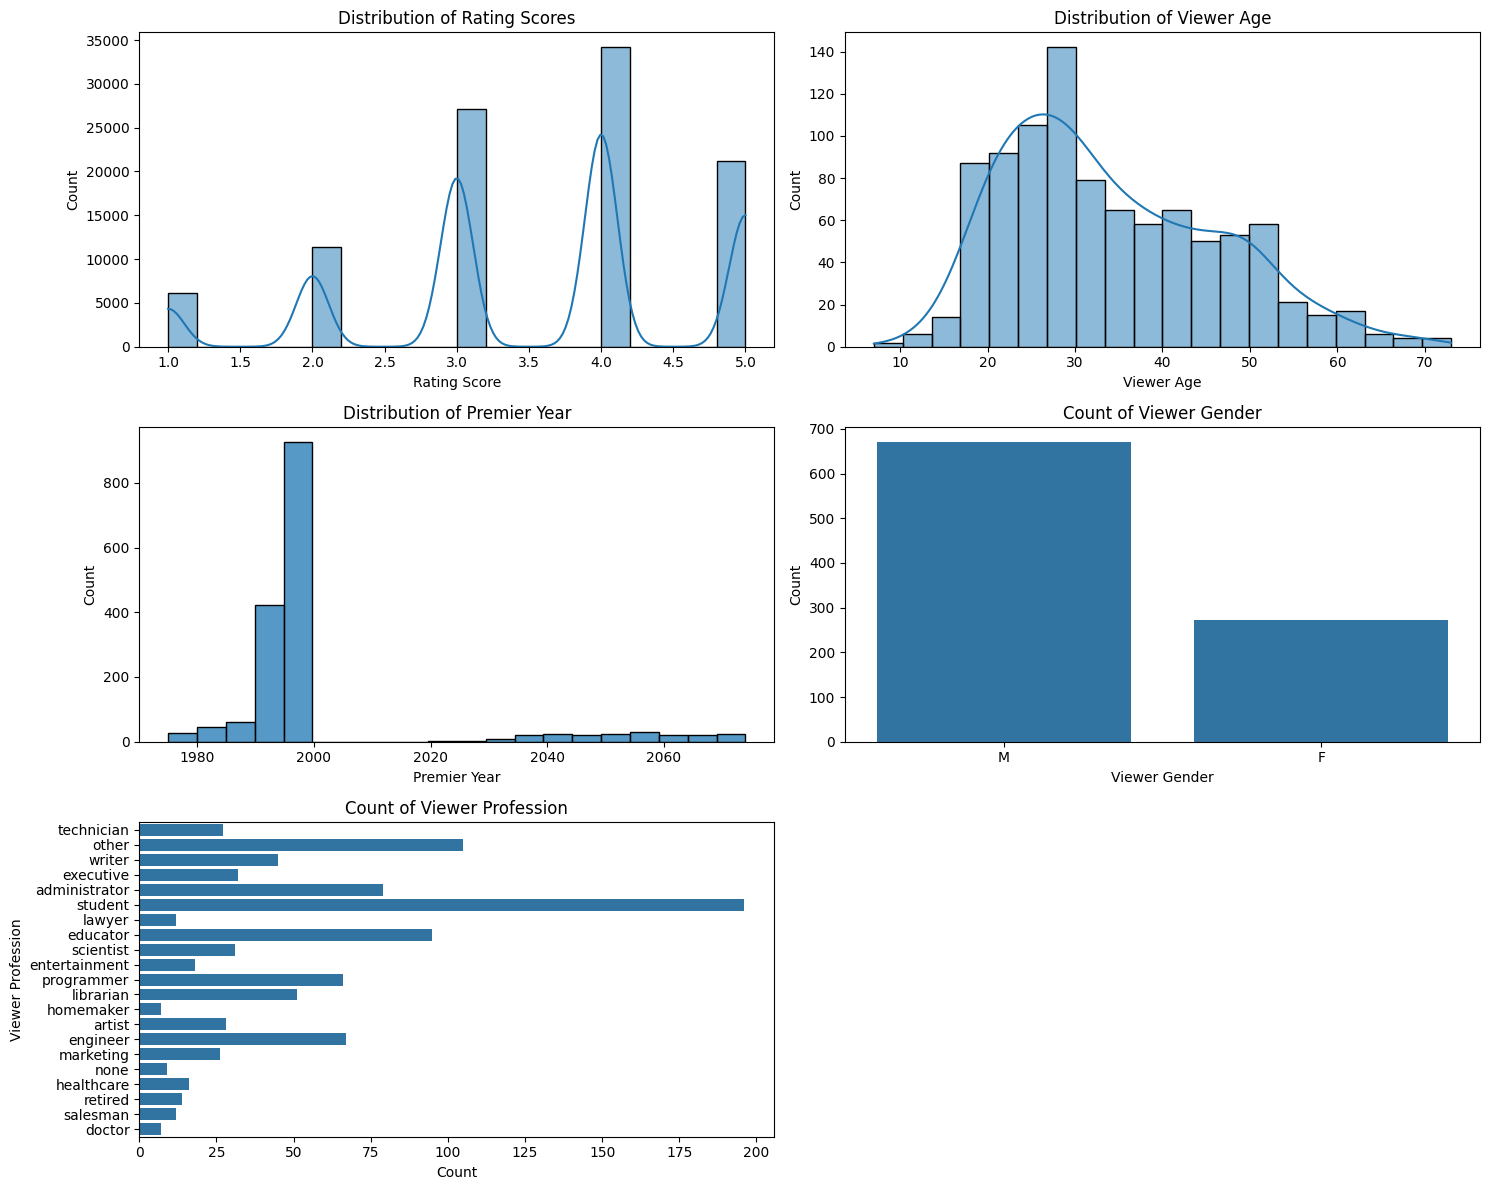

In [ ]:
#7. Univariate plots of columns: 'rating_score', 'viewer_ge', 'premier_year', 'viewer_gender' and 'viewer_profession'
#Since there is only a 'premier_date' column and not a 'premier_year' column, I converted the 'premier_date' column to datetime to extract year

#Select only the columns 'premier_year' plus all the genre columns from the original DataFrame, and put them into a new DataFrame called data
film_catalog_clean['premier_date'] = pd.to_datetime(film_catalog_clean['premier_date'], errors='coerce')
film_catalog_clean['premier_year'] = film_catalog_clean['premier_date'].dt.year

# Convert 'premier_date' to datetime and extract the year and select only year and genre columns
genre_cols = film_catalog_clean.columns[4:-1]  # exclude 'premier_date' and include only genre columns
data = film_catalog_clean[['premier_year'] + list(genre_cols)]

# Drop rows where 'premier_year' is missing
data = data.dropna(subset=['premier_year'])

plt.figure(figsize=(15, 12))

# 1. rating_score
plt.subplot(3, 2, 1)
sns.histplot(viewer_feedback['rating_score'].dropna(), bins=20, kde=True)
plt.title('Distribution of Rating Scores')
plt.xlabel('Rating Score')
plt.ylabel('Count')

# 2. viewer_age
plt.subplot(3, 2, 2)
sns.histplot(subscriber_profiles['viewer_age'].dropna(), bins=20, kde=True)
plt.title('Distribution of Viewer Age')
plt.xlabel('Viewer Age')
plt.ylabel('Count')

# 3. premier_year
plt.subplot(3, 2, 3)
sns.histplot(data['premier_year'].dropna(), bins=20, kde=False)
plt.title('Distribution of Premier Year')
plt.xlabel('Premier Year')
plt.ylabel('Count')

# 4. viewer_gender
plt.subplot(3, 2, 4)
sns.countplot(x='viewer_gender', data=subscriber_profiles)
plt.title('Count of Viewer Gender')
plt.xlabel('Viewer Gender')
plt.ylabel('Count')

# 5. viewer_profession
plt.subplot(3, 2, 5)
sns.countplot(y='viewer_profession', data=subscriber_profiles)
plt.title('Count of Viewer Profession')
plt.xlabel('Count')
plt.ylabel('Viewer Profession')

plt.tight_layout()
plt.show()


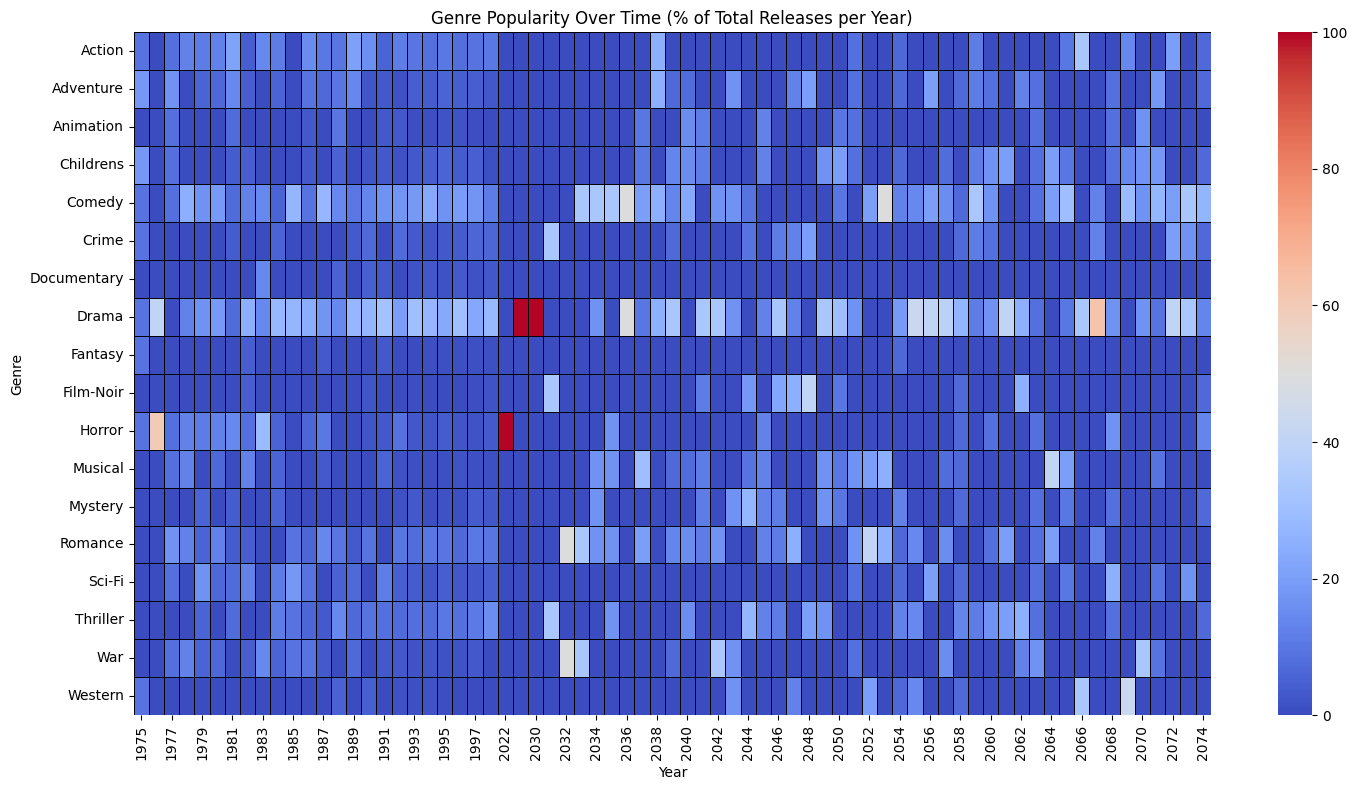

In [ ]:
#8. Visualize the change in genre popularity over time (2 marks)
# o Use the percentage of total releases per year as an indicator of a genre's popularity.
# o Each cell should represent the number of releases for a genre in a specific year. Drop any irrelevant columns to clean your data.
# o Once you have the percentages, visualize the trends using univariate plots or a heatmap to capture genre popularity changes across years in a single view.

yearly_genre_count = data.groupby('premier_year').sum() #group by year and sum genres
total_releases = yearly_genre_count.sum(axis=1) #sum genres per year

yearly_genre_pct = yearly_genre_count.div(total_releases, axis=0) * 100  #percentage

#plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(yearly_genre_pct.T, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Genre Popularity Over Time (% of Total Releases per Year)')
plt.xlabel('Year')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
